#Import libaraies

In [ ]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

import time 

#Mount Driver

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!ls "/content/drive/My Drive/Colab Notebooks/5012 Group"

!cp -r '/content/drive/My Drive/Colab Notebooks/5012 Group/data' "./data"

!ls

Mounted at /content/drive
'5012 Group_data.ipynb'					'log reg'
'5012 Group.ipynb'					'model ensemble.ipynb'
 data							 svm
'(Latest)5012 Group.ipynb'				 xgboost
'Logistic Regression & SVM & Xgboost & LightGBM.ipynb'
data  drive  sample_data


#Import data

In [ ]:
#df = pd.read_csv('/content/UCI_Credit_Card.csv')
df = pd.read_csv('./data/UCI_Credit_Card.csv')

#Data Exploration

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#Data Preparation

In [ ]:
non_feature_col = ['ID','default.payment.next.month']
X = df[[col for col in df.columns if col not in non_feature_col]]
y = df['default.payment.next.month']

In [ ]:
#Normalizing Data
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

Handle imbalance data using SMOTE



In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y.value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

Train test split

In [ ]:
#with smote
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
#without smote
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest (no validation)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=3, random_state=42, n_jobs=-1)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
val_roc_auc_score = roc_auc_score(y_test, rf.predict(X_test))  #test error
val_roc_auc_score1 = roc_auc_score(y_train, rf.predict(X_train))  #train error

In [ ]:
val_roc_auc_score

0.8203215958640184

In [ ]:
val_roc_auc_score1

0.9502162452118686

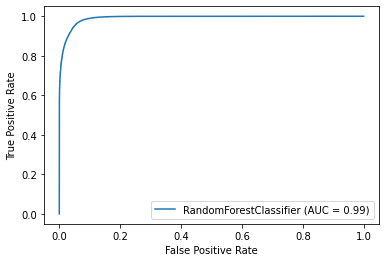

In [ ]:
#Train
metrics.plot_roc_curve(rf, X_train, y_train)
plt.show()

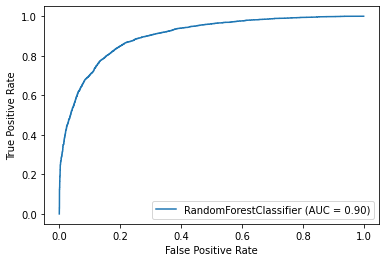

In [ ]:
#Test
metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

#Tune hyper parameters

In [ ]:
  # Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [100, 200], 
                     'max_depth': [15,20],
                     'min_samples_leaf':[3, 5],
                     'n_jobs':[-1]
                     }]

rf = RandomForestClassifier()

cv_split = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)

clf_rf = GridSearchCV(rf, tuned_parameters, n_jobs=-1, cv=cv_split, scoring='roc_auc')

clf_rf.fit(X_train, y_train)

print(clf_rf.best_params_)
print(clf_rf.best_score_ )

{'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 200, 'n_jobs': -1}
0.9027196382949022


In [ ]:
val_roc_auc_score = roc_auc_score(y_test, clf_rf.predict(X_test))  #test error
val_roc_auc_score1 = roc_auc_score(y_train, clf_rf.predict(X_train))  #train error

In [ ]:
val_roc_auc_score

0.8217177222646785

In [ ]:
val_roc_auc_score1

0.9513931537520458

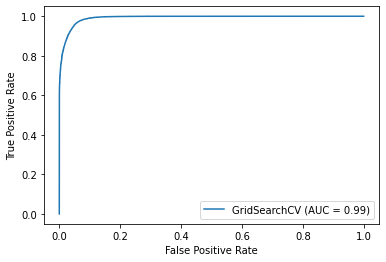

In [ ]:
#Train
metrics.plot_roc_curve(clf_rf, X_train, y_train)
plt.show()

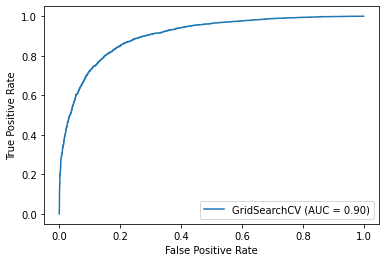

In [ ]:
#Test
metrics.plot_roc_curve(clf_rf, X_test, y_test)
plt.show()

#RF after optimize

In [ ]:
rf_V2 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=3, random_state=42, n_jobs=-1)
rf_V2.fit(X_train,y_train)
val_roc_auc_score_V2 = roc_auc_score(y_test, rf_V2.predict(X_test))  #test error
val_roc_auc_score_V2_1 = roc_auc_score(y_train, rf_V2.predict(X_train))  #train error

In [ ]:
val_roc_auc_score_V2

0.8175466532532535

In [ ]:
val_roc_auc_score_V2_1

0.9516073408760298

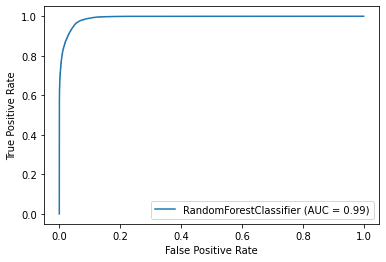

In [ ]:
#Train
metrics.plot_roc_curve(rf_V2, X_train, y_train)
plt.show()

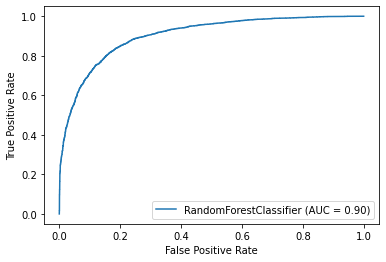

In [ ]:
#Test
metrics.plot_roc_curve(rf_V2, X_test, y_test)
plt.show()

#Gradient Tree Boosting (no validataion)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=10,learning_rate=0.1, random_state=42)
gb.fit(X_train,y_train)
val_roc_auc_score = roc_auc_score(y_test, gb.predict(X_test))  #test error
val_roc_auc_score1 = roc_auc_score(y_train, gb.predict(X_train))  #train error

In [ ]:
val_roc_auc_score

0.866677507669605

In [ ]:
val_roc_auc_score1

0.9594866945620109

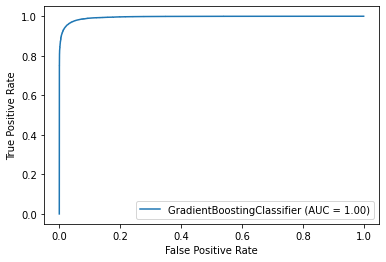

In [ ]:
#Train
metrics.plot_roc_curve(gb, X_train, y_train)
plt.show()

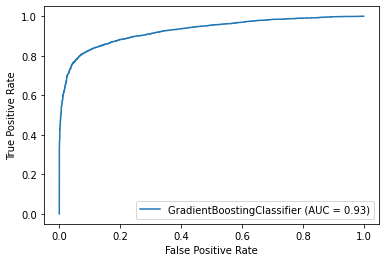

In [ ]:
#Test
metrics.plot_roc_curve(gb, X_test, y_test)
plt.show()

#Tune hyper parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [100, 150, 200], 
                     'max_features':[10],
                     'max_depth': [8, 10, 15],
                     'min_samples_leaf':[3, 5],
                     'learning_rate': [0.1],
                     'random_state': [42]
                     }]

gb = GradientBoostingClassifier()

cv_split = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)

clf_gb = GridSearchCV(gb, tuned_parameters, n_jobs=-1, cv=cv_split, scoring='roc_auc')
clf_gb.fit(X_train,y_train)

print(clf_gb.best_params_)
print(clf_gb.best_score_ )


{'learning_rate': 0.1, 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 5, 'n_estimators': 200, 'random_state': 42}
0.9438073648876


In [ ]:
val_roc_auc_score_cv = roc_auc_score(y_test, clf_gb.predict(X_test))  #test error
val_roc_auc_score_cv1 = roc_auc_score(y_train, clf_gb.predict(X_train))  #train error

In [ ]:
val_roc_auc_score_cv

0.8801271135834255

In [ ]:
val_roc_auc_score_cv1

0.9996522260839596

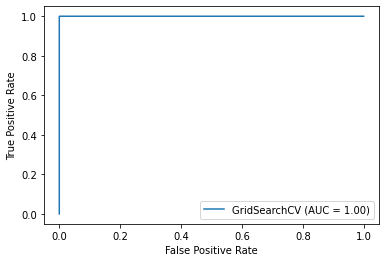

In [ ]:
#Train
metrics.plot_roc_curve(clf_gb, X_train, y_train)
plt.show()

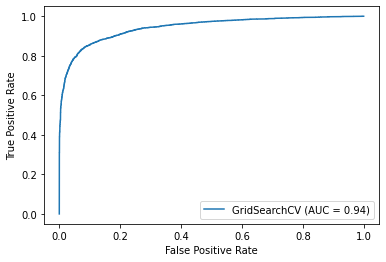

In [ ]:
#Test
metrics.plot_roc_curve(clf_gb, X_test, y_test)
plt.show()

#GBT after optimize

In [ ]:
gb_V2 = GradientBoostingClassifier(n_estimators=200,max_depth=15,min_samples_leaf=5,max_features=10,learning_rate=0.1,random_state=42)
gb_V2.fit(X_train,y_train)
val_roc_auc_score_V2 = roc_auc_score(y_test, gb_V2.predict(X_test))  #test error
val_roc_auc_score_V2_1 = roc_auc_score(y_train, gb_V2.predict(X_train))  #train error

In [ ]:
val_roc_auc_score_V2

0.8801271135834255

In [ ]:
val_roc_auc_score_V2_1

0.9996522260839596

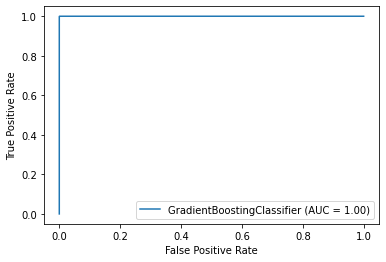

In [ ]:
#Train
metrics.plot_roc_curve(gb_V2, X_train, y_train)
plt.show()

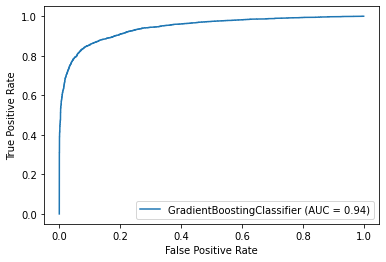

In [ ]:
#Test
metrics.plot_roc_curve(gb_V2, X_test, y_test)
plt.show()

#DNN (no validation)

In [ ]:
from sklearn.neural_network import MLPClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(16), max_iter=2000, activation="relu", random_state=42)
nn.fit(X_train,y_train)
val_roc_auc_score = roc_auc_score(y_test, nn.predict(X_test))  #test error
val_roc_auc_score1 = roc_auc_score(y_train, nn.predict(X_train))  #train error

In [ ]:
val_roc_auc_score

0.7043566910389266

In [ ]:
val_roc_auc_score1

0.7137183865964951

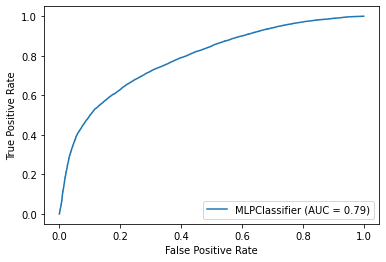

In [ ]:
#Train
metrics.plot_roc_curve(nn, X_train, y_train)
plt.show()

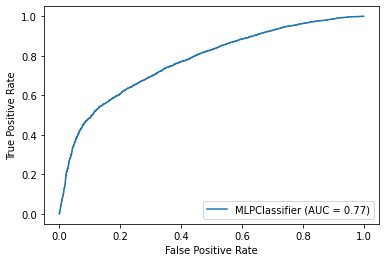

In [ ]:
#Test
metrics.plot_roc_curve(nn, X_test, y_test)
plt.show()

#Tune hyper parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{
          'hidden_layer_sizes': [(16), (32), (16, 16)],
          'activation': ['relu','tanh'],
          'max_iter': [1000,2000],
          'solver': ['adam'],
          'random_state': [42]
          }]

nn = MLPClassifier()

cv_split = ShuffleSplit(n_splits=5, train_size=0.8, test_size=0.2)

clf_nn = GridSearchCV(nn, tuned_parameters, n_jobs=-1, cv=cv_split, scoring='roc_auc')
clf_nn.fit(X_train,y_train)

print(clf_nn.best_params_)
print(clf_nn.best_score_ )


{'activation': 'tanh', 'hidden_layer_sizes': (16, 16), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}
0.7886032411247687


In [ ]:
val_roc_auc_score_cv = roc_auc_score(y_test, clf_nn.predict(X_test))  #test error
val_roc_auc_score_cv1 = roc_auc_score(y_train, clf_nn.predict(X_train))  #train error

In [ ]:
val_roc_auc_score_cv

0.7096946409115454

In [ ]:
val_roc_auc_score_cv1

0.7171176894228023

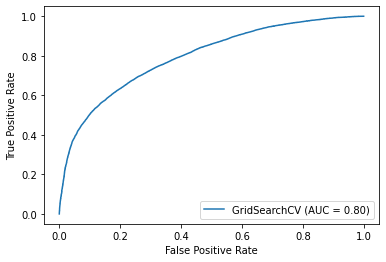

In [ ]:
#Train
metrics.plot_roc_curve(clf_nn, X_train, y_train)
plt.show()

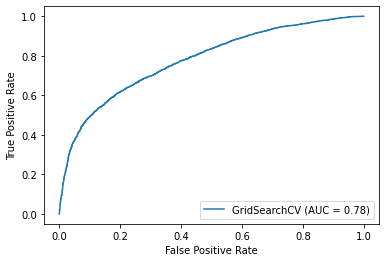

In [ ]:
#Test
metrics.plot_roc_curve(clf_nn, X_test, y_test)
plt.show()

#DNN after optimize

In [ ]:
nn_V2 = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000, activation="tanh", solver="adam", random_state=42)
nn_V2.fit(X_train,y_train)
val_roc_auc_score = roc_auc_score(y_test, nn_V2.predict(X_test))  #test error
val_roc_auc_score1 = roc_auc_score(y_train, nn_V2.predict(X_train))  #train error

In [ ]:
val_roc_auc_score

0.7096946409115454

In [ ]:
val_roc_auc_score1

0.7171176894228023

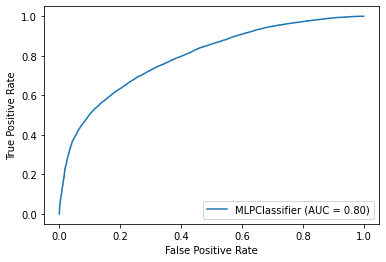

In [ ]:
#Train
metrics.plot_roc_curve(nn_V2, X_train, y_train)
plt.show()

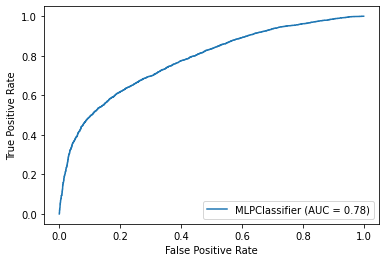

In [ ]:
#Test
metrics.plot_roc_curve(nn_V2, X_test, y_test)
plt.show()